In [20]:
import json
import seaborn as sns
import pandas as  pd
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pickle

In [21]:
with open('/Users/charumehndiratta/Downloads/business_df.pickle', 'rb') as handle:
    business_df = pickle.load(handle)

In [22]:
with open('/Users/charumehndiratta/Downloads/review_df.pickle', 'rb') as handle:
    reviews_df = pickle.load(handle)

In [23]:
with open('/Users/charumehndiratta/Downloads/business_categories_df.pickle', 'rb') as handle:
    business_categories_df = pickle.load(handle)

In [24]:
bc_df = business_categories_df[business_categories_df['category_name'] == 'Restaurants']

In [25]:
ans = business_df[business_df['name'] == 'Chipotle Mexican Grill']

In [26]:
new_ans = pd.merge(business_df, ans, on='postal_code')

In [27]:
final_ans = new_ans[new_ans['business_id_x'] != new_ans['business_id_y']]

In [28]:
fin_ans = final_ans.rename(index=str, columns={"business_id_x": "business_id"})

In [29]:
new_ans = pd.merge(reviews_df, fin_ans, on='business_id', how='inner')

In [30]:
def func1(str):
    return pd.to_datetime(str).year

b_df = new_ans['date'].apply(lambda row: func1(row))


In [31]:
new_ans['year'] = b_df

In [37]:
final_new_ans = new_ans[(new_ans['year'] >= 2007 )& (new_ans['year'] <= 2009) ]

In [38]:
final_new_ans.head(1)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,city_x,...,business_id_y,city_y,is_open_y,latitude_y,longitude_y,name_y,review_count_y,stars_y,state_y,year
39,pLZ9oZM8c6MNbRlg06lBPg,0,2009-07-31,0,kHW5QO84yjYFisHqqYSlHw,1,693,1,TIeFdVEQiMKrVlC-YUbMGg,Las Vegas,...,AI7zxDNVgO3pDyAP_rcA7A,Las Vegas,1,36.291499,-115.287365,Chipotle Mexican Grill,97,3.0,NV,2009


In [39]:
total_stars_surrounding_rest = final_new_ans[['review_count_y', 'year']]

In [40]:
review_count = total_stars_surrounding_rest['review_count_y'].tolist()
year = total_stars_surrounding_rest['year'].tolist()

final_result = {}
for i in range(len(review_count)):
    if year[i] in final_result:
        final_result[year[i]]['review_count'] = final_result[year[i]]['review_count'] + review_count[i]
        final_result[year[i]]['count'] = final_result[year[i]]['count'] + 1
    else:
        final_result[year[i]] = {'review_count' : review_count[i], 'count':1}

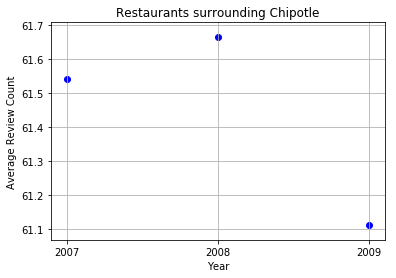

In [41]:
# final_result
import matplotlib.pyplot as plt

plt.xlabel("Year")
plt.ylabel("Average Review Count")
plt.grid()

x_label = list(final_result.keys())
vals = list(final_result.values())

y_label = []
for val in vals:  
    y_label.append(val['review_count']/val['count'])
plt.scatter(
    x_label,
    y_label,
    color='b')

plt.xticks(x_label)
plt.title('Restaurants surrounding Chipotle')
plt.savefig('fun_fact_chipotle.png')